In [1]:
import numpy as np
import pandas as pd                                  # for data wrangling and analysis
import mglearn

import sklearn as sk                                 # for machine learning
from sklearn.model_selection import train_test_split # split data into 75% training & 25% test sets
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colormaps
# list(colormaps)

d:\Temp\ipykernel_24012\1985642282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                  # for data wrangling and analysis


**2. Wave dataset**

Text(0.5, 1.0, 'Regression')

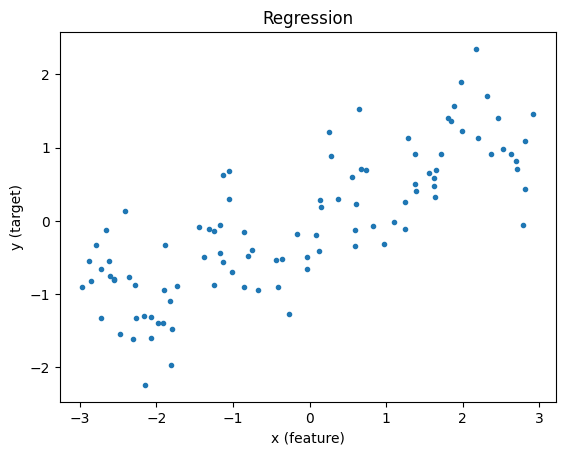

In [90]:
X2, y2 = mglearn.datasets.make_wave()
df2 = pd.DataFrame(X2, columns=['X'])
df2 = df2.assign(y = y2)

plt.scatter(df2['X'], df2['y'], marker = '.')
plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.title('Regression')

**3. Wisconsin Breast Cancer dataset**

In [84]:
from sklearn.datasets import load_breast_cancer
df3 = load_breast_cancer()
print('Cancer dataset keys: {}'.format(df3.keys()))

cancer = pd.DataFrame(df3['data'], columns = df3['feature_names'])
cancer = cancer.assign(y = df3['target'])
cancer['outcome'] = cancer['y'].map({1:'malignant', 0:'benign'})
print("Sample counts per class:{}".format({n: v for n, v in zip(cancer['outcome'], np.bincount(cancer['y']))}))

display(cancer)

Cancer dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample counts per class:{'benign': 357}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,benign


**4. Boston Housing dataset**

*<u> Goal </u>: We will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility.*

In [85]:
from fairlearn.datasets import fetch_boston

X, y = fetch_boston(return_X_y = True)
boston = pd.concat([X, y], axis=1) # concatenate pandas objects along colume
print('Data shape:{}'.format(boston.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32)

Data shape:(506, 14)


C:\Users\pquyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fairlearn\datasets\_fetch_boston.py:135: DataFairnessWarning: You are about to use a dataset with known fairness issues.
  warnings.warn(DataFairnessWarning(msg))


**k-nearest neighbors (kNN) classification**

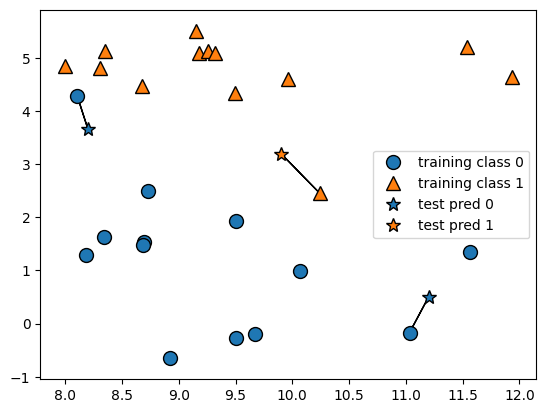